In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os, re

In [2]:
warnings.filterwarnings(action='ignore')

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample = pd.read_csv('sample_submission.csv')

In [4]:
pd.set_option('max_columns',300)
train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [5]:
test.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,1,Widowed,Auto,Comedy,Female,10,Daytime,United-States,0.027465,Low,No
1,4,Married-civ-spouse,Pharma,Comedy,Male,40,Morning,United-States,0.056262,High,Yes
2,5,Divorced,Entertainment,Comedy,Female,50,Morning,United-States,0.027465,Low,No
3,9,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,No
4,10,Married-civ-spouse,Pharma,Comedy,Male,40,Primetime,United-States,0.027465,Low,Yes


In [6]:
sample.head(1)

,id,netgain
0,31820,True


In [7]:
print(train.shape, test.shape)

(26048, 12) (6513, 11)


In [8]:
train.rename(columns={'money_back_guarantee': 'money_back_g'}, inplace= True)
test.rename(columns={'money_back_guarantee': 'money_back_g'}, inplace= True)

In [9]:
train.describe(include = ['O','F','int64'])

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,expensive,money_back_g
count,26048.000000,26048,26048,26048,26048,26048.000000,26048,26048,26048,26048
unique,NaN,7,6,5,2,NaN,3,42,3,2
top,NaN,Married-civ-spouse,Pharma,Comedy,Male,NaN,Primetime,United-States,Low,Yes
freq,NaN,11844,10339,22258,17245,NaN,15652,23250,15693,13073
mean,16268.744779,NaN,NaN,NaN,NaN,40.294111,NaN,NaN,NaN,NaN
std,9413.578020,NaN,NaN,NaN,NaN,12.479457,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,8095.750000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN
50%,16237.000000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN
75%,24413.500000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN


In [10]:
test.describe(include = ['O','F','int64'])

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,expensive,money_back_g
count,6513.000000,6513,6513,6513,6513,6513.000000,6513,6513,6513,6513
unique,NaN,7,6,5,2,NaN,3,41,3,2
top,NaN,Married-civ-spouse,Pharma,Comedy,Male,NaN,Primetime,United-States,Low,Yes
freq,NaN,3013,2614,5560,4346,NaN,3920,5807,3949,3330
mean,16330.013358,NaN,NaN,NaN,NaN,40.568095,NaN,NaN,NaN,NaN
std,9344.526074,NaN,NaN,NaN,NaN,12.575851,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,8364.000000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN
50%,16437.000000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN
75%,24444.000000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 12 columns):
id                                   26048 non-null int64
realtionship_status                  26048 non-null object
industry                             26048 non-null object
genre                                26048 non-null object
targeted_sex                         26048 non-null object
average_runtime(minutes_per_week)    26048 non-null int64
airtime                              26048 non-null object
airlocation                          26048 non-null object
ratings                              26048 non-null float64
expensive                            26048 non-null object
money_back_g                         26048 non-null object
netgain                              26048 non-null bool
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 2.2+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 11 columns):
id                                   6513 non-null int64
realtionship_status                  6513 non-null object
industry                             6513 non-null object
genre                                6513 non-null object
targeted_sex                         6513 non-null object
average_runtime(minutes_per_week)    6513 non-null int64
airtime                              6513 non-null object
airlocation                          6513 non-null object
ratings                              6513 non-null float64
expensive                            6513 non-null object
money_back_g                         6513 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 559.8+ KB


## Cleaning

In [13]:
train.drop(columns = 'id', inplace=True)
test.drop(columns = 'id', inplace=True)

In [14]:
set(train.airlocation).difference(set(test.airlocation))

{'Holand-Netherlands'}

In [15]:
x = train[train.airlocation == 'Holand-Netherlands'].index
train.drop(index = x, inplace= True)
train.reset_index(drop = True , inplace= True)

In [16]:
train.netgain.value_counts()

False    19851
True      6195
Name: netgain, dtype: int64

In [17]:
#train['average_runtime(minutes_per_week)'] = pd.cut(
#    train['average_runtime(minutes_per_week)'],[i for i in range(0,101,5)], labels = [i for i in range(20)])

#test['average_runtime(minutes_per_week)'] = pd.cut(
#    test['average_runtime(minutes_per_week)'],[i for i in range(0,101,5)], labels = [i for i in range(20)])

In [18]:
train.head()

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_g,netgain
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


## Relationship

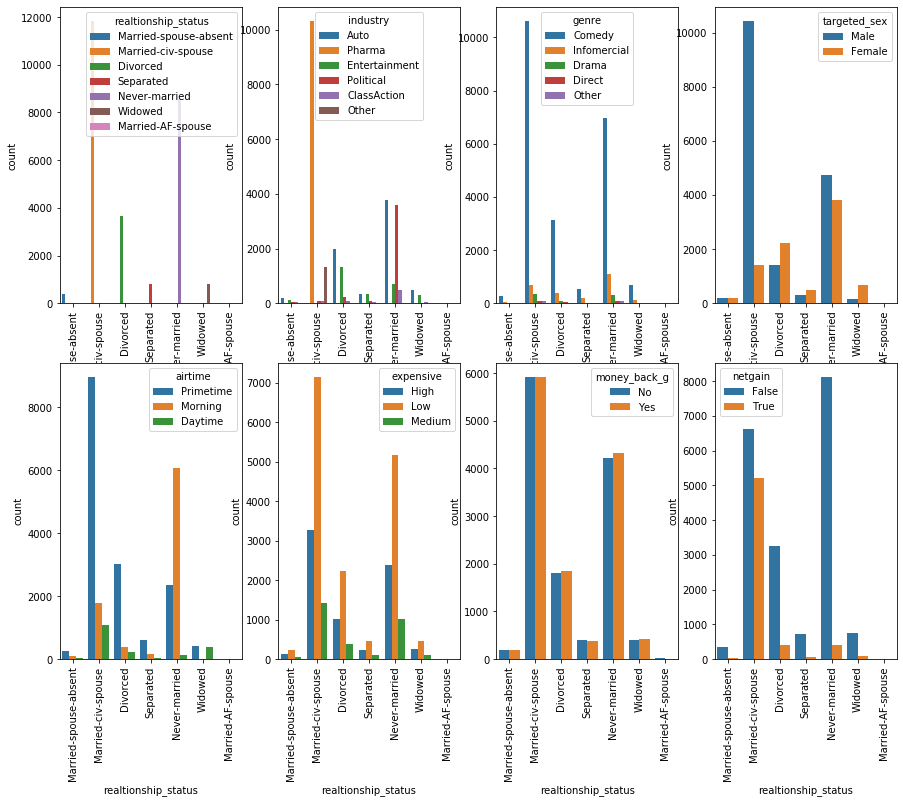

In [19]:
fig, ax = plt.subplots(2,4, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(2,4,s)
        sns.countplot(train.realtionship_status, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

In [20]:
#train.realtionship_status.replace({'Divorced': 'Separated'}, inplace= True)
#test.realtionship_status.replace({'Divorced': 'Separated'}, inplace= True)

In [21]:
t = ['Widowed', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse', 'Never-married', 'Divorced']
train['single'] = train.realtionship_status.map(lambda x: 'Yes' if x in t else 'No')
test['single'] = test.realtionship_status.map(lambda x: 'Yes' if x in t else 'No')

#train.realtionship_status.replace({'Married-AF-spouse':'Married-spouse-absent'}, inplace= True)
#test.realtionship_status.replace({'Married-AF-spouse':'Married-spouse-absent'}, inplace= True)

### Industry

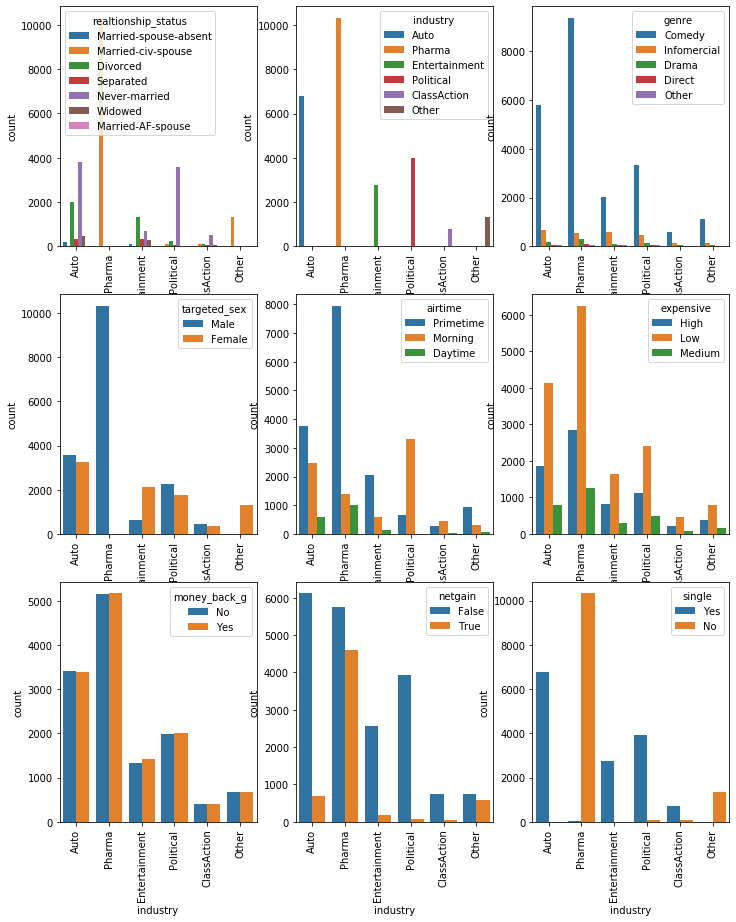

In [22]:
fig, ax = plt.subplots(3,3, figsize=(12,15))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.industry, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

In [23]:
train.groupby('single')['industry'].value_counts()

single  industry     
No      Pharma           10324
        Other             1331
        ClassAction         94
        Political           87
        Auto                 8
Yes     Auto              6793
        Political         3927
        Entertainment     2765
        ClassAction        700
        Pharma              15
        Other                2
Name: industry, dtype: int64

In [24]:
train.groupby(['single','industry'])['netgain'].value_counts()

single  industry       netgain
No      Auto           False         8
        ClassAction    False        80
                       True         14
        Other          False       734
                       True        597
        Pharma         False      5731
                       True       4593
        Political      False        78
                       True          9
Yes     Auto           False      6109
                       True        684
        ClassAction    False       673
                       True         27
        Entertainment  False      2578
                       True        187
        Other          False         2
        Pharma         False         9
                       True          6
        Political      False      3849
                       True         78
Name: netgain, dtype: int64

### Genre

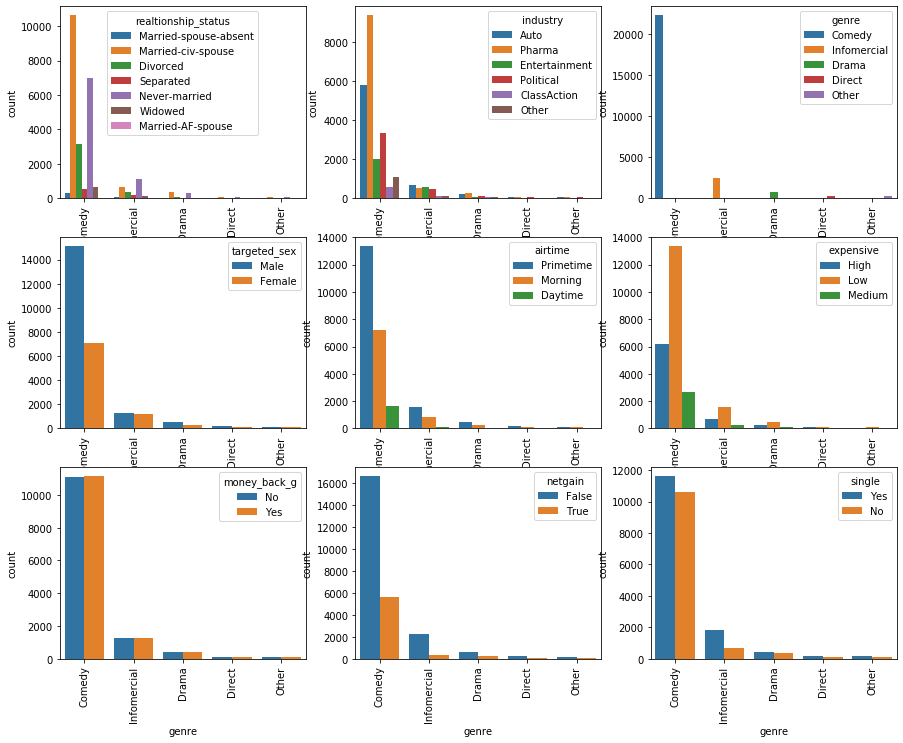

In [25]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.genre, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

In [26]:
train.head(1)

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_g,netgain,single
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False,Yes


### Target sex

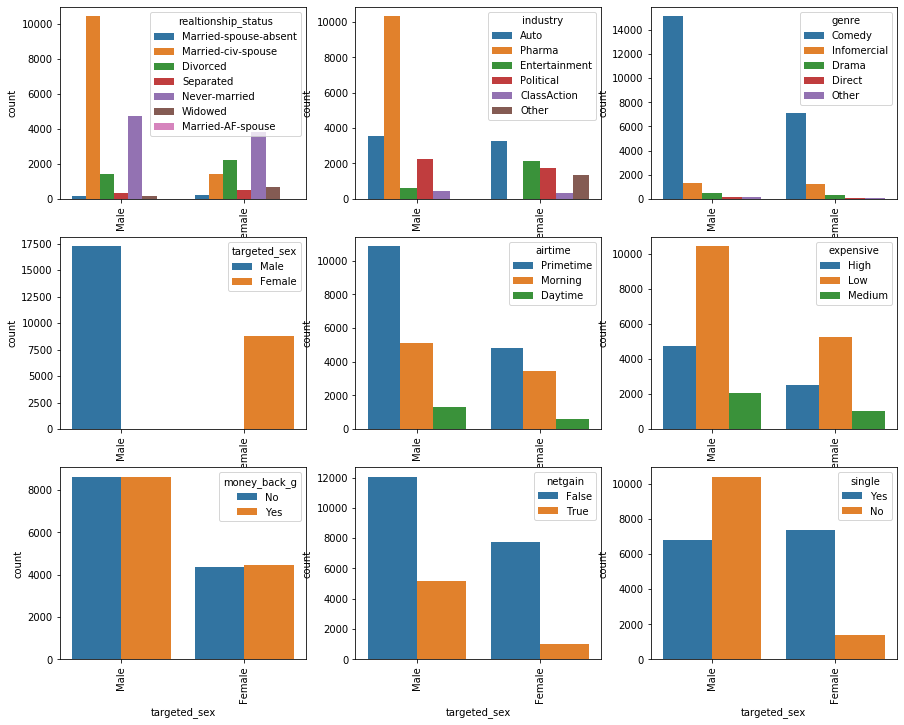

In [27]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.targeted_sex, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

### AirTime

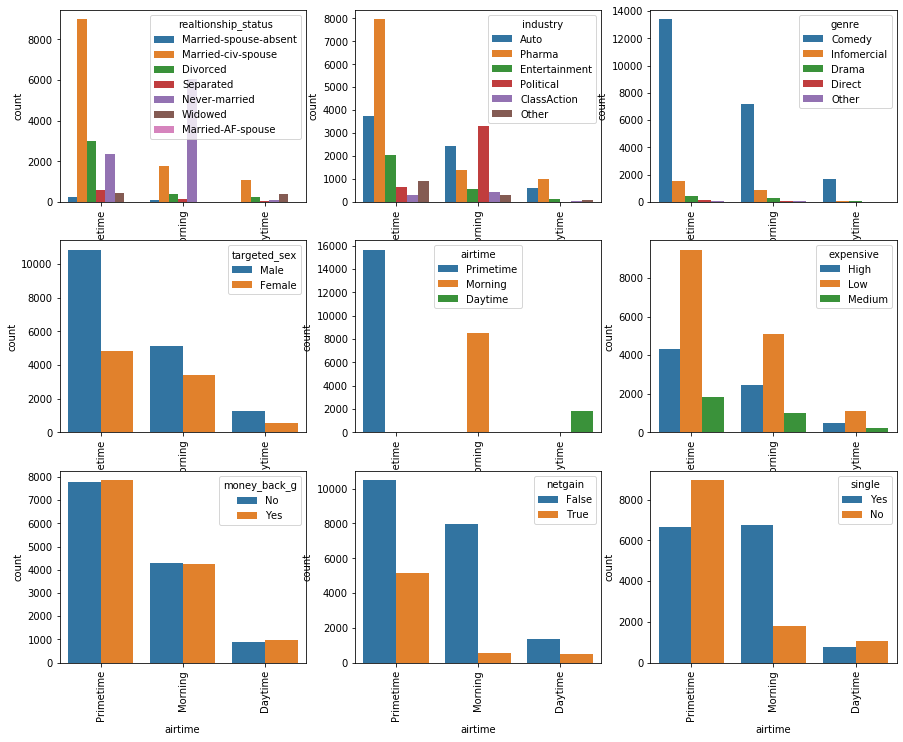

In [28]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.airtime, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

In [29]:
train.head(1)

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_g,netgain,single
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False,Yes


## Expensive

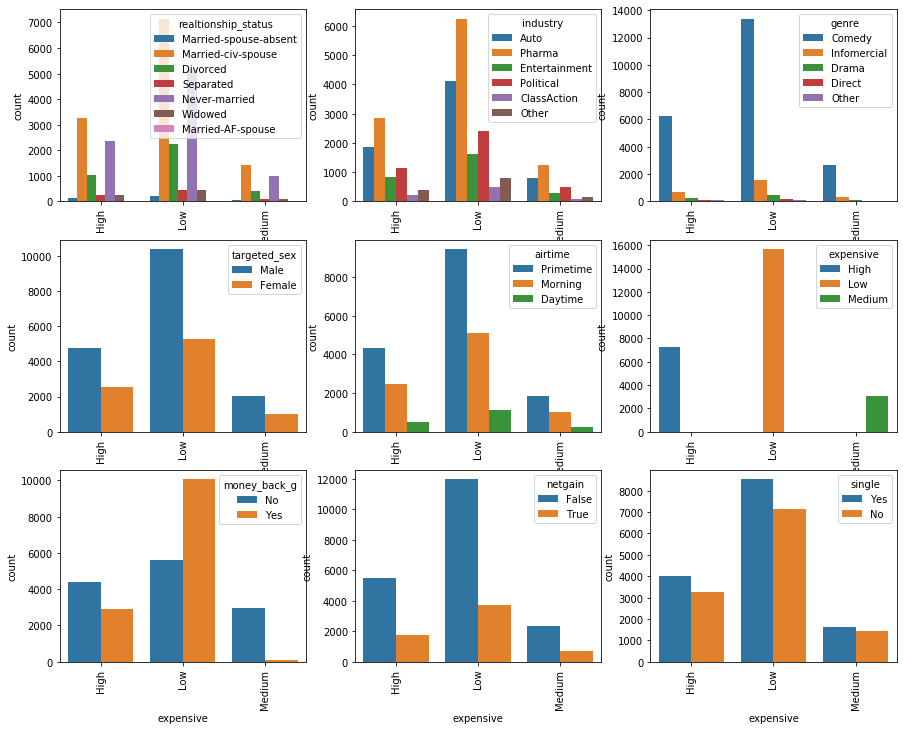

In [30]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.expensive, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

## MoneyBack

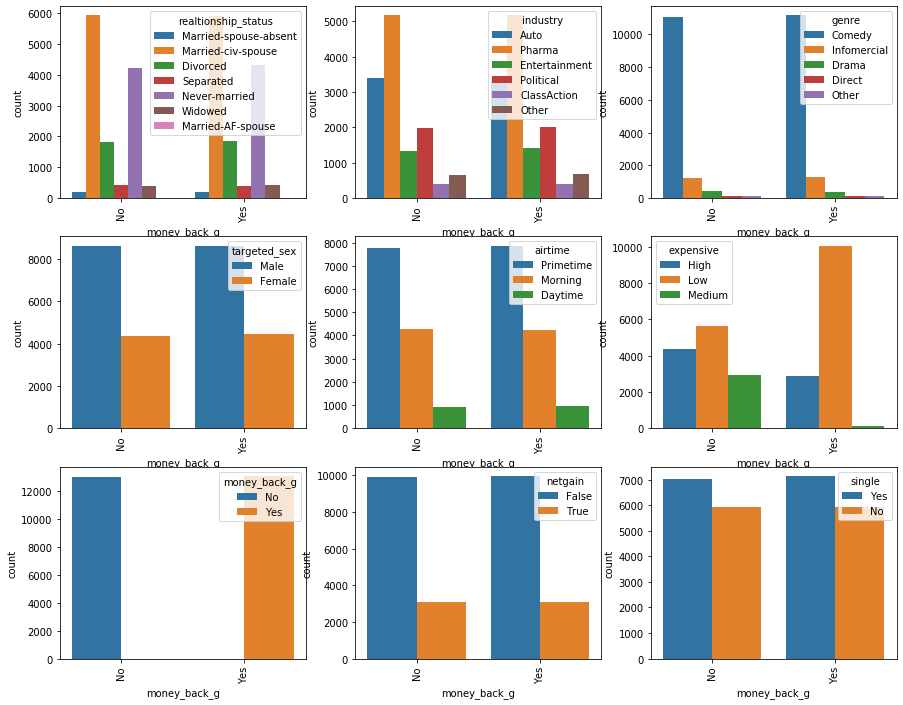

In [31]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.money_back_g, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

In [32]:
#train.drop(columns = 'money_back_g', inplace=True)
#test.drop(columns = 'money_back_g', inplace=True)

## Netgain

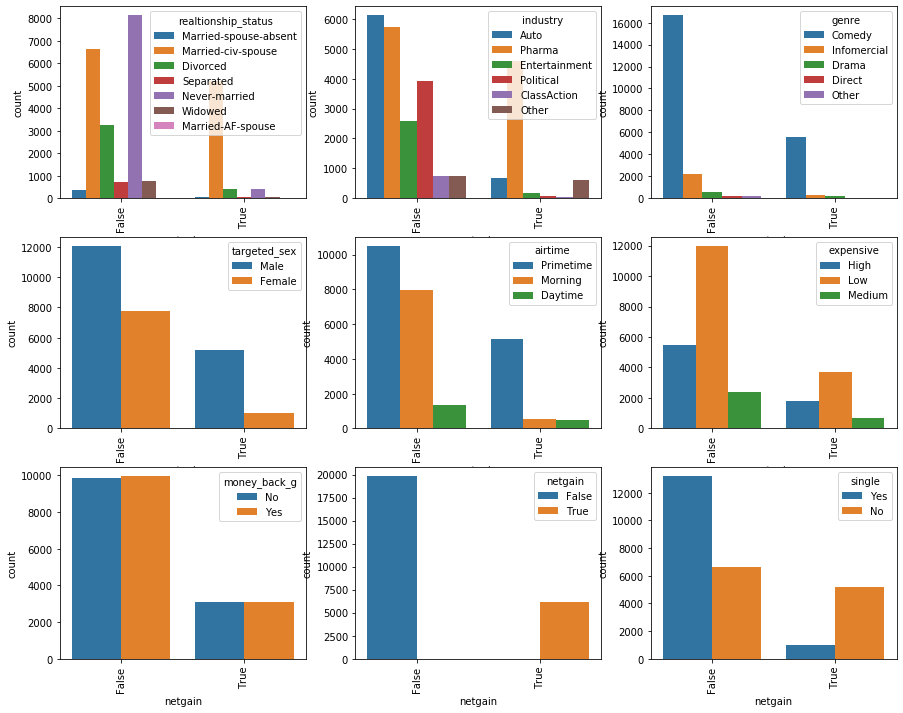

In [33]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.netgain, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

## 'single'

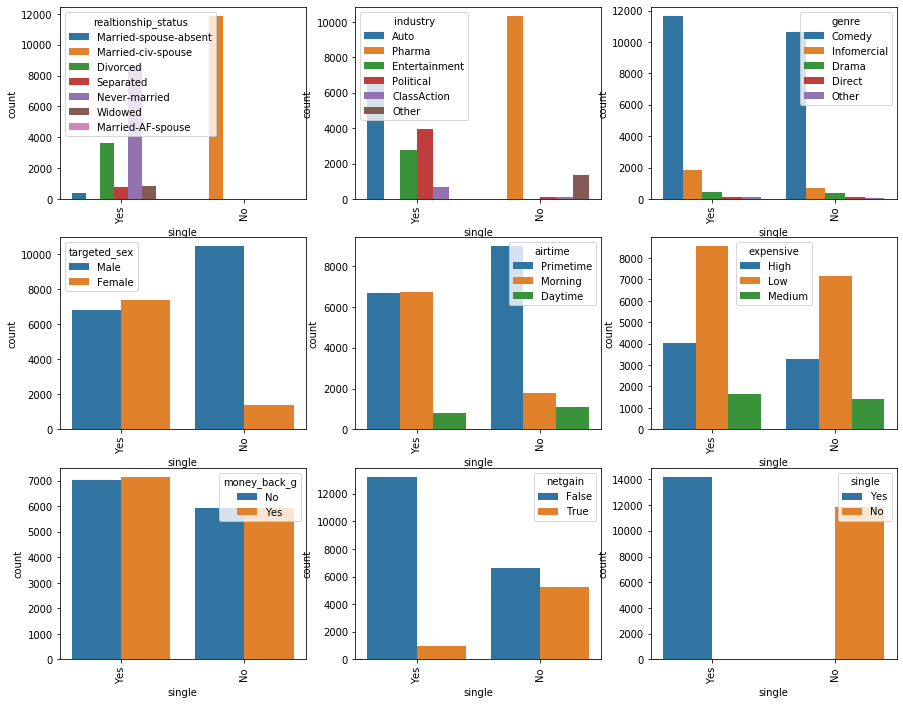

In [34]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.single, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

In [35]:
train.head(1)

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_g,netgain,single
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False,Yes


##  airlocation

In [36]:
country2continent = ({'Asia':['Philippines','India', 'Vietnam','Japan','China', 'Taiwan', 'Iran','Laos','Combodia', 'Hong',
                           'Thiland',' South'],
                   'Europe':['Germany','England','Italy', 'Poland', 'Portugal', 'France','Yugoslavia', 'Ireland','Greece',
                             'Scotland', 'Hungary'],
                   'North_America':['United-States','Mexico','Canada','Cuba','Puerto-Rico','El-Salvador', 'Jamaica',
                                    'Dominican-Republic','Guatemala', 'Haiti', 'Nicaragu', 'Honduras',
                                     'Outlying-US(Guam-USVI-etc)'],
                   'South_America':['Columbia','Ecuador', 'Peru','Trinadad&Tobago'],
                   'International':['International']})

def func(x):
    for continent in country2continent.keys():
        if(x in country2continent[continent]):
            return(continent)

train['continents'] = train.airlocation.apply(lambda x: func(x))
test['continents'] = test.airlocation.apply(lambda x: func(x))

## rating

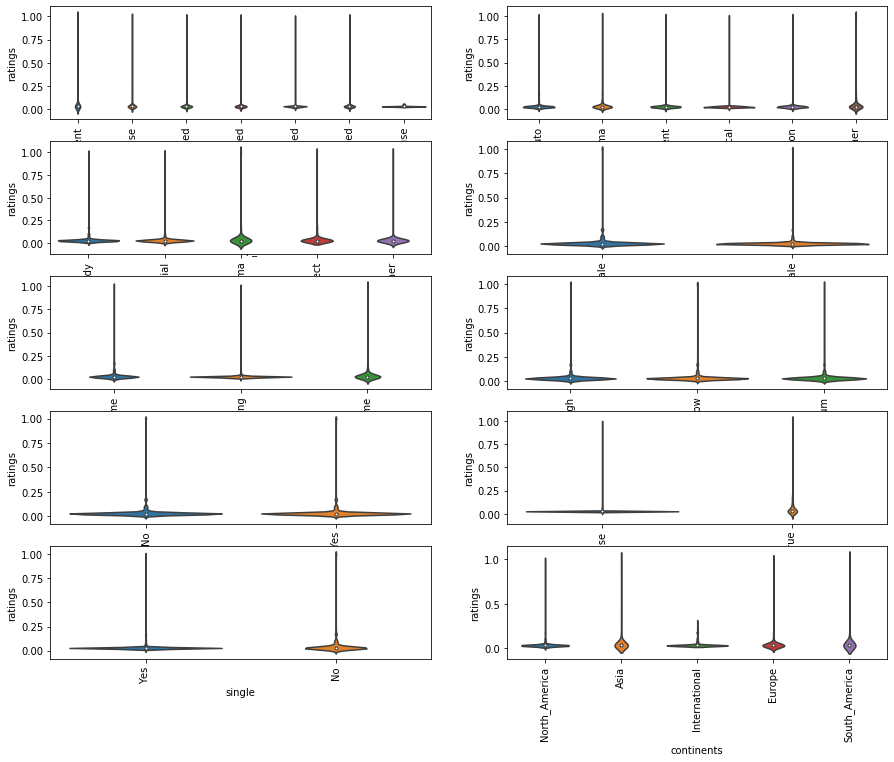

In [37]:
fig, ax = plt.subplots(5,2, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(5,2,s)
        sns.violinplot(y = train.ratings, x = train[i])
        plt.xticks(rotation=90)
        s += 1

In [38]:
train[train.ratings > 0.095].netgain.value_counts()

True     1135
False      36
Name: netgain, dtype: int64

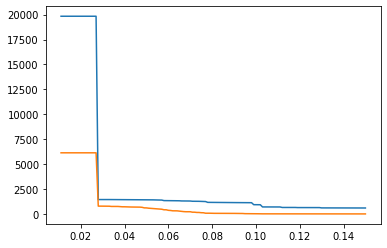

In [39]:
y = []
x = []
for i in np.arange(0.15,0.01,-0.001):
    y.append(train[train.ratings > i].netgain.value_counts().values)
    x.append(i)
plt.plot(x,y )

In [40]:
train.ratings = train.ratings.apply(lambda x: 0.095 if x >= 0.095 else x)
test.ratings = test.ratings.apply(lambda x: 0.095 if x >= 0.095 else x)

In [41]:
#train['rating_good'] = train.ratings.apply(lambda x: 'yes' if x>0.01 else 'no')
#test['rating_good'] = test.ratings.apply(lambda x: 'yes' if x>0.1 else 'no')

3.4046936375952024 10.34675208665881


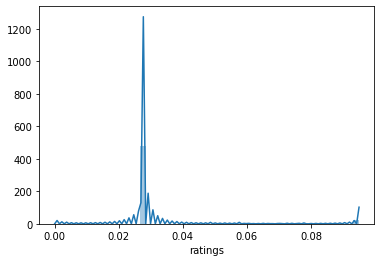

In [42]:
sns.distplot(train.ratings)
print(train.ratings.skew(), train.ratings.kurt())

3.051524381800271 3.074337708512217


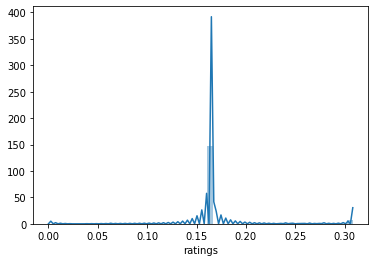

In [43]:
sns.distplot((train.ratings)**(1/2))
print(((train.ratings)**(1/2)).skew(), np.sqrt(((train.ratings)**(1/2)).kurt()))

In [44]:
#train.ratings = (train.ratings)**(1/4)
#test.ratings = (test.ratings)**(1/4)

In [45]:
train.head()

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_g,netgain,single,continents
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False,Yes,North_America
1,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False,No,North_America
2,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False,Yes,North_America
3,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False,Yes,North_America
4,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True,No,North_America


sns.distplot(train['average_runtime(minutes_per_week)'])
print(train['average_runtime(minutes_per_week)'].skew(), train['average_runtime(minutes_per_week)'].kurt())

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26046 entries, 0 to 26045
Data columns (total 13 columns):
realtionship_status                  26046 non-null object
industry                             26046 non-null object
genre                                26046 non-null object
targeted_sex                         26046 non-null object
average_runtime(minutes_per_week)    26046 non-null int64
airtime                              26046 non-null object
airlocation                          26046 non-null object
ratings                              26046 non-null float64
expensive                            26046 non-null object
money_back_g                         26046 non-null object
netgain                              26046 non-null bool
single                               26046 non-null object
continents                           25920 non-null object
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 2.4+ MB


In [47]:
train.columns

Index(['realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_g', 'netgain', 'single',
       'continents'],
      dtype='object')

In [48]:
train.realtionship_status = train.realtionship_status.astype('category')
train.industry = train.industry.astype('category')
train.genre = train.genre.astype('category')
train.targeted_sex = train.targeted_sex.astype('category')
train.airtime = train.airtime.astype('category')
train.expensive = train.expensive.astype('category')
train.money_back_g = train.money_back_g.astype('category')
train.single = train.single.astype('category')
train['average_runtime(minutes_per_week)'] = np.log1p(train['average_runtime(minutes_per_week)']).astype('float')
#train.airlocation = train.airlocation.astype('category')

#test.airlocation = test.airlocation.astype('category')
test['average_runtime(minutes_per_week)'] = np.log1p(test['average_runtime(minutes_per_week)']).astype('float')
test.single = test.single.astype('category')
test.realtionship_status = test.realtionship_status.astype('category')
test.industry = test.industry.astype('category')
test.genre = test.genre.astype('category')
test.targeted_sex = test.targeted_sex.astype('category')
test.airtime = test.airtime.astype('category')
test.expensive = test.expensive.astype('category')
test.money_back_g = test.money_back_g.astype('category')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train.airlocation = le.fit_transform(train.airlocation)
test.airlocation = le.transform(test.airlocation)

In [49]:
train.head(1)

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_g,netgain,single,continents
0,Married-spouse-absent,Auto,Comedy,Male,3.828641,Primetime,38,0.027465,High,No,False,Yes,North_America


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26046 entries, 0 to 26045
Data columns (total 13 columns):
realtionship_status                  26046 non-null category
industry                             26046 non-null category
genre                                26046 non-null category
targeted_sex                         26046 non-null category
average_runtime(minutes_per_week)    26046 non-null float64
airtime                              26046 non-null category
airlocation                          26046 non-null int32
ratings                              26046 non-null float64
expensive                            26046 non-null category
money_back_g                         26046 non-null category
netgain                              26046 non-null bool
single                               26046 non-null category
continents                           25920 non-null object
dtypes: bool(1), category(8), float64(2), int32(1), object(1)
memory usage: 942.5+ KB


In [51]:
train_label = train.netgain
train.drop(columns = 'netgain', inplace=True)

In [52]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first= True)

In [53]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
train = pd.DataFrame(mm.fit_transform(train), columns = train.columns)
test = pd.DataFrame(mm.transform(test), columns = test.columns)

In [54]:
train.shape , test.shape

((26046, 29), (6513, 29))

%%time
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
#sm = SMOTE(ratio='minority')
#sm = SMOTETomek(ratio='auto')
sm = TomekLinks(ratio='majority')
x,y = sm.fit_sample(train, train_label)
train = pd.DataFrame(x, columns = train.columns)
train_label = pd.Series(y, name='netgain')

In [55]:
train.shape, train_label.shape

((26046, 29), (26046,))

## Feature Selection

%%time
from sklearn.feature_selection import chi2, SelectKBest, SelectFromModel, RFE
best_1 = SelectKBest(chi2, k=20)
best_1.fit(train, train_label)

from sklearn.linear_model import LogisticRegression
best_2 = RFE(LogisticRegression(), n_features_to_select=20)
best_2.fit(train, train_label)

from sklearn.ensemble import RandomForestClassifier
best_3 = SelectFromModel(RandomForestClassifier(), threshold= '1.25 *median')
best_3.fit(train, train_label)

import lightgbm as lgb
best_4 = SelectFromModel(lgb.LGBMClassifier(), max_features=20)
best_4.fit(train, train_label)

import xgboost as xgb
best_5= SelectFromModel(xgb.XGBClassifier(scale_pos_weight = 3.2), max_features=20)
best_5.fit(train, train_label)

best = pd.DataFrame({'Chi2': best_1.get_support(), 'K_Best': best_2.get_support(), 'RF': best_3.get_support(),
              'LGB': best_4.get_support(), 'XGB': best_5.get_support()})
best.head(1)

np.sum(best, axis = 1).value_counts()

train.columns = [a for a in range(26)]
test.columns = [a for a in range(26)]

x = best[np.sum(best, axis = 1)<2].index
train.drop(columns=x, inplace= True)
test.drop(columns=x, inplace=True)

In [56]:
train.shape, test.shape

((26046, 29), (6513, 29))

## ML

In [57]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, accuracy_score, confusion_matrix, precision_recall_curve,classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn.utils import shuffle

In [103]:
def folds(train, label, model, xg_boost = None, lg_boost = None, param = None, testset = None):
  
    df = pd.concat([train, label], axis =1)
    false_index = df[df.netgain == False].index
    true_index = df[df.netgain == True].index
    df_False = df.drop(index = true_index)
    df_True = df.drop(index = false_index)
    
    df_True.reset_index(drop=True, inplace=True)
    df_False.reset_index(drop=True, inplace=True)
    
    kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=919)
    
    for i,batch in enumerate(np.array_split(df_False, 2)):
        batch = pd.concat([batch, df_True], axis = 0)
        batch = shuffle(batch)
        batch.reset_index(drop=True, inplace=True)
        train = batch.drop(columns = 'netgain')
        train_label = batch.netgain
        
        predicted = pd.DataFrame(np.zeros(len(train_label)))
        predicted.columns = ['Answer']
        predicted_prob = pd.DataFrame(np.zeros(shape=(len(train_label),2)))

        for t_ind, v_ind in kfold.split(train.values, train_label.values):
            xtrain , ytrain = train.loc[t_ind,:], train_label[t_ind]
            xval , yval = train.loc[v_ind,:], train_label[v_ind]

            if xg_boost is not None :
                training = xgb.DMatrix(xtrain, ytrain)
                testing = xgb.DMatrix(xval, yval)
                model = xgb.train(param , training, evals = [(training, 'training'),(testing, 'testing')],
                                 num_boost_round = 7000, early_stopping_rounds = 600, verbose_eval = 5)
                predicted.loc[v_ind,'Answer'] = model.predict(testing, ntree_limit= model.best_ntree_limit)

            elif lg_boost is not None :
                training = lgb.Dataset(xtrain, ytrain)
                testing = lgb.Dataset(xval, yval, reference=training)
                model = lgb.train(param , training, valid_sets = [training,testing],
                                 num_boost_round = 7000, early_stopping_rounds = 600, verbose_eval = 5)
                predicted.loc[v_ind,'Answer'] = model.predict(xval, best_iteration= model.best_iteration)

            else :
                model.fit(xtrain, ytrain)
                predicted.loc[v_ind,'Answer'] = model.predict(xval)
                predicted_prob.loc[v_ind] = model.predict_proba(xval)
    
        if xg_boost is not None or lg_boost is not None :
            fig, ax = plt.subplots(1,3,figsize=(15,4))
            precision , recall, threshold = precision_recall_curve(train_label, predicted)
            plt.subplot(1,2,1)
            plt.plot(precision, recall, 'g--')
            plt.title('F1 score : %s' %f1_score(train_label, np.where(predicted > 0.5 ,1 ,0)))
            plt.xlabel('Precision')
            plt.ylabel('Precision')

            fpr, tpr, threshold = roc_curve(train_label, predicted)
            plt.subplot(1,2,2)
            plt.plot(fpr, tpr,'b--')
            plt.title('AUC score : %s' %auc(fpr,tpr))
            print(confusion_matrix(train_label, np.where(predicted > 0.5 ,1 ,0)))
            print('Accuracy is %s' %accuracy_score(train_label, np.where(predicted > 0.5 ,1 ,0)))
            print('Matrix %s' %classification_report(train_label, np.where(predicted > 0.5 ,1 ,0)))

            if xg_boost is not None:
                xgb.plot_importance(model)
            else:
                lgb.plot_importance(model)

        else :
            fig, ax = plt.subplots(1,3,figsize=(15,4))
            precision , recall, threshold = precision_recall_curve(train_label, predicted_prob.iloc[:,1])
            plt.subplot(1,2,1)
            plt.plot(precision, recall, 'g--')
            plt.title('F1 score : %s' %f1_score(train_label, predicted))
            plt.xlabel('Precision')
            plt.ylabel('Precision')

            fpr, tpr, threshold = roc_curve(train_label, predicted_prob.iloc[:,1])
            plt.subplot(1,2,2)
            plt.plot(fpr, tpr,'b--')
            plt.title('AUC score : %s' %auc(fpr,tpr))
            print(confusion_matrix(train_label, predicted))
            print('Accuracy is %s' %accuracy_score(train_label, predicted))
            print('Matrix %s' %classification_report(train_label, predicted))

        if xg_boost is not None :
            df = model.predict(xgb.DMatrix(testset), ntree_limit= model.best_ntree_limit)
        elif lg_boost is not None :
            df = model.predict(testset, best_iteration = model.best_iteration)
        else:
            df = model.predict(testset)
    return(df)

In [104]:
def cv_style(train, label, model = None, test = None):
    df = pd.concat([train, label], axis =1)
    false_index = df[df.netgain == False].index
    true_index = df[df.netgain == True].index
    df_False = df.drop(index = true_index)
    df_True = df.drop(index = false_index)
    
    df_True.reset_index(drop=True, inplace=True)
    df_False.reset_index(drop=True, inplace=True)
    
    prediction_train = pd.DataFrame(np.eye(len(train.index),3))
    prediction_train.columns = [i for i in range(3)]
    prediction_test = pd.DataFrame(np.eye(6513,3))
    prediction_test.columns = [i for i in range(3)]
    
    for i,batch in enumerate(np.array_split(df_False, 3)):
        batch = pd.concat([batch, df_True], axis = 0)
        print('Examples in batch :', batch.netgain.value_counts())
        batch = shuffle(batch)
        model.fit(batch.drop(columns = 'netgain'), batch.netgain)
    
        prediction_train.iloc[:,i] = model.predict(train)
        prediction_test.iloc[:,i] = model.predict(test)
        print('accuracy : ',accuracy_score(prediction_train.iloc[:,i], label), 'f1 Score : ',
              f1_score(prediction_train.iloc[:,i], label))
    
    return(prediction_train, prediction_test)

### Logistic

[[7559 2367]
 [1293 4902]]
Accuracy is 0.7729669375348924
Matrix               precision    recall  f1-score   support

       False       0.85      0.76      0.81      9926
        True       0.67      0.79      0.73      6195

    accuracy                           0.77     16121
   macro avg       0.76      0.78      0.77     16121
weighted avg       0.78      0.77      0.78     16121

[[7582 2343]
 [1373 4822]]
Accuracy is 0.7694789081885856
Matrix               precision    recall  f1-score   support

       False       0.85      0.76      0.80      9925
        True       0.67      0.78      0.72      6195

    accuracy                           0.77     16120
   macro avg       0.76      0.77      0.76     16120
weighted avg       0.78      0.77      0.77     16120



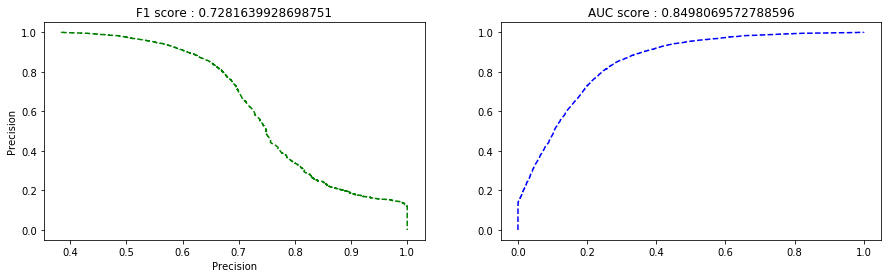

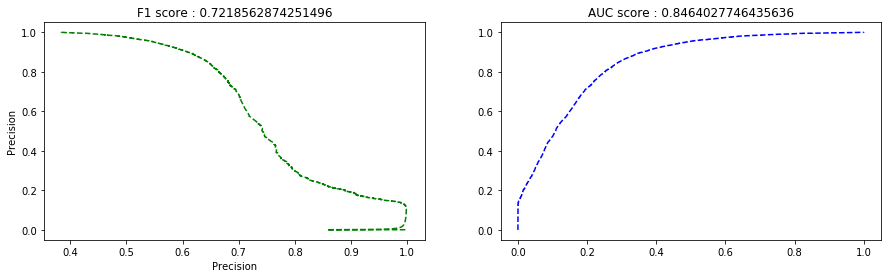

In [105]:
lg = LogisticRegression(C = 0.1)
answer = folds(train, train_label, lg, testset = test)
#df_train, df_test = cv_style(train, train_label, lg, test)

### SGD Classifier

In [106]:
#sgd = SGDClassifier(tol = 1e-8, loss = 'huber')
#folds(train, train_label, sgd)

### DecisionTree

[[7630 2296]
 [1564 4631]]
Accuracy is 0.7605607592581105
Matrix               precision    recall  f1-score   support

       False       0.83      0.77      0.80      9926
        True       0.67      0.75      0.71      6195

    accuracy                           0.76     16121
   macro avg       0.75      0.76      0.75     16121
weighted avg       0.77      0.76      0.76     16121

[[7523 2402]
 [1575 4620]]
Accuracy is 0.753287841191067
Matrix               precision    recall  f1-score   support

       False       0.83      0.76      0.79      9925
        True       0.66      0.75      0.70      6195

    accuracy                           0.75     16120
   macro avg       0.74      0.75      0.75     16120
weighted avg       0.76      0.75      0.76     16120



array([False, False,  True, ..., False,  True, False])

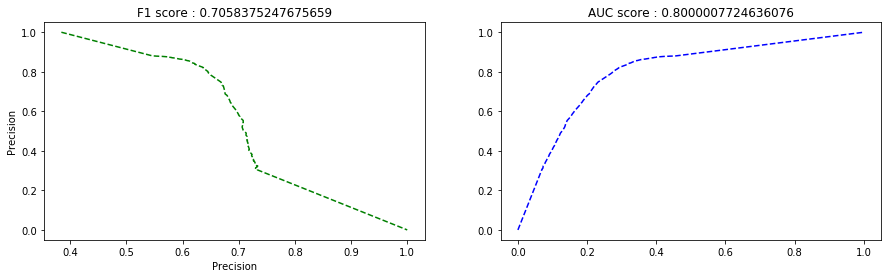

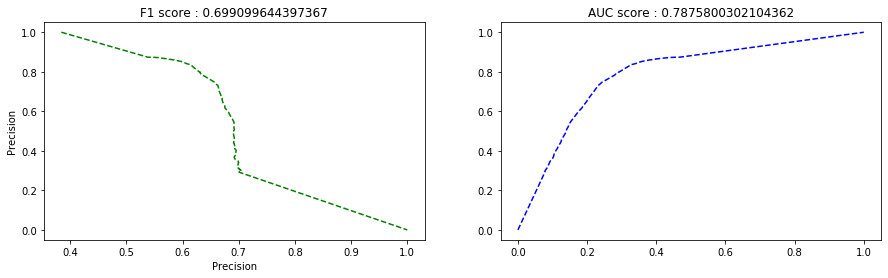

In [107]:
dtc = DecisionTreeClassifier()
folds(train, train_label, dtc, testset = test)
#df_train, df_test = cv_style(train, train_label, dtc, test )


### SVC

[[4778 1754]
 [ 989 5206]]
Accuracy is 0.7844739530132788
Matrix               precision    recall  f1-score   support

       False       0.83      0.73      0.78      6532
        True       0.75      0.84      0.79      6195

    accuracy                           0.78     12727
   macro avg       0.79      0.79      0.78     12727
weighted avg       0.79      0.78      0.78     12727



ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

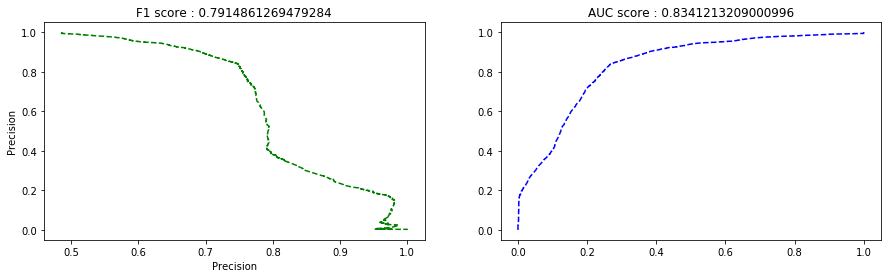

In [166]:
svc = SVC(probability=True)
folds(train, train_label, svc)
#df_train, df_test = cv_style(train, train_label, svc, test )

### RandomForest

[[7581 2345]
 [1470 4725]]
Accuracy is 0.7633521493703864
Matrix               precision    recall  f1-score   support

       False       0.84      0.76      0.80      9926
        True       0.67      0.76      0.71      6195

    accuracy                           0.76     16121
   macro avg       0.75      0.76      0.76     16121
weighted avg       0.77      0.76      0.77     16121

[[7574 2351]
 [1582 4613]]
Accuracy is 0.7560173697270471
Matrix               precision    recall  f1-score   support

       False       0.83      0.76      0.79      9925
        True       0.66      0.74      0.70      6195

    accuracy                           0.76     16120
   macro avg       0.74      0.75      0.75     16120
weighted avg       0.76      0.76      0.76     16120



array([False,  True, False, ..., False,  True, False])

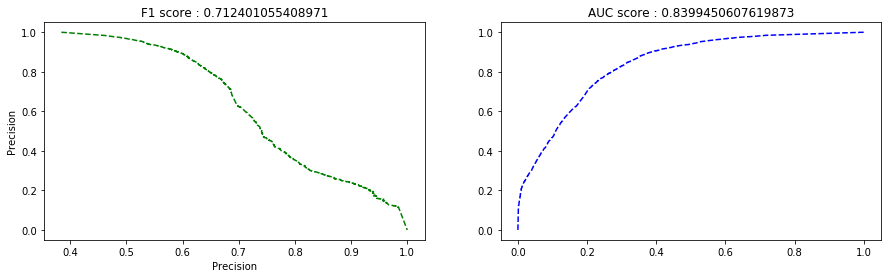

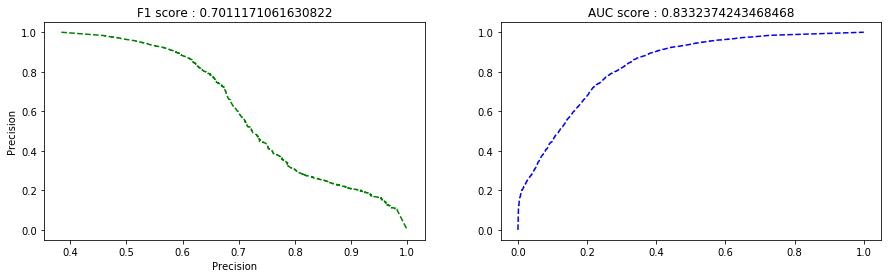

In [108]:
rf = RandomForestClassifier(n_estimators=100, random_state=92)
folds(train, train_label, rf, testset = test)
#df_train, df_test = cv_style(train, train_label, rf, test)

In [109]:
pd.Series(rf.feature_importances_, index = train.columns).sort_values(ascending=False)

average_runtime(minutes_per_week)            0.202277
ratings                                      0.175876
realtionship_status_Married-civ-spouse       0.126312
single_Yes                                   0.099742
industry_Pharma                              0.068983
airtime_Morning                              0.044437
realtionship_status_Never-married            0.037880
airlocation                                  0.036917
airtime_Primetime                            0.035139
money_back_g_Yes                             0.023074
expensive_Low                                0.022879
targeted_sex_Male                            0.017153
industry_Political                           0.014489
genre_Infomercial                            0.013728
expensive_Medium                             0.012465
industry_Other                               0.011005
industry_Entertainment                       0.010049
genre_Drama                                  0.008137
continents_North_America    

## STacking

In [110]:
stack = StackingClassifier(final_estimator= LogisticRegression(),
                   estimators=[('rf', RandomForestClassifier()),('xgb', xgb.XGBClassifier()),
                               ('lgb', lgb.LGBMClassifier())])

df_train, df_test = cv_style(train, train_label, stack, test)

Examples in batch : False    6617
True     6195
Name: netgain, dtype: int64
accuracy :  0.7715196191353759 f1 Score :  0.6380390487196643
Examples in batch : False    6617
True     6195
Name: netgain, dtype: int64
accuracy :  0.7735544805344391 f1 Score :  0.6382926530111616
Examples in batch : False    6617
True     6195
Name: netgain, dtype: int64
accuracy :  0.7681409813407049 f1 Score :  0.6338446613714909


## XGB

[0]	training-auc:0.866651	testing-auc:0.861633
Multiple eval metrics have been passed: 'testing-auc' will be used for early stopping.

Will train until testing-auc hasn't improved in 600 rounds.
[5]	training-auc:0.86896	testing-auc:0.862714
[10]	training-auc:0.870434	testing-auc:0.863807
[15]	training-auc:0.87112	testing-auc:0.863676
[20]	training-auc:0.872389	testing-auc:0.864524
[25]	training-auc:0.873026	testing-auc:0.86437
[30]	training-auc:0.873574	testing-auc:0.864187
[35]	training-auc:0.874586	testing-auc:0.864304
[40]	training-auc:0.875319	testing-auc:0.865371
[45]	training-auc:0.876371	testing-auc:0.865784
[50]	training-auc:0.877183	testing-auc:0.866515
[55]	training-auc:0.87767	testing-auc:0.866419
[60]	training-auc:0.8779	testing-auc:0.866737
[65]	training-auc:0.87833	testing-auc:0.867043
[70]	training-auc:0.878637	testing-auc:0.867068
[75]	training-auc:0.878966	testing-auc:0.866825
[80]	training-auc:0.879268	testing-auc:0.866749
[85]	training-auc:0.879662	testing-auc:0.8670

[85]	training-auc:0.876638	testing-auc:0.872534
[90]	training-auc:0.87678	testing-auc:0.87281
[95]	training-auc:0.877946	testing-auc:0.873626
[100]	training-auc:0.87836	testing-auc:0.873564
[105]	training-auc:0.879065	testing-auc:0.873606
[110]	training-auc:0.879619	testing-auc:0.873912
[115]	training-auc:0.879828	testing-auc:0.874029
[120]	training-auc:0.880486	testing-auc:0.874167
[125]	training-auc:0.88126	testing-auc:0.874051
[130]	training-auc:0.88172	testing-auc:0.873866
[135]	training-auc:0.882086	testing-auc:0.873871
[140]	training-auc:0.882465	testing-auc:0.873881
[145]	training-auc:0.882816	testing-auc:0.87387
[150]	training-auc:0.883139	testing-auc:0.873838
[155]	training-auc:0.883541	testing-auc:0.873798
[160]	training-auc:0.883784	testing-auc:0.873883
[165]	training-auc:0.884061	testing-auc:0.873802
[170]	training-auc:0.884369	testing-auc:0.873903
[175]	training-auc:0.884898	testing-auc:0.873871
[180]	training-auc:0.885283	testing-auc:0.873994
[185]	training-auc:0.885723	t

[185]	training-auc:0.8917	testing-auc:0.862302
[190]	training-auc:0.89193	testing-auc:0.862276
[195]	training-auc:0.89239	testing-auc:0.862242
[200]	training-auc:0.892631	testing-auc:0.862164
[205]	training-auc:0.893149	testing-auc:0.861923
[210]	training-auc:0.89331	testing-auc:0.861883
[215]	training-auc:0.893588	testing-auc:0.861807
[220]	training-auc:0.893825	testing-auc:0.861726
[225]	training-auc:0.89398	testing-auc:0.861663
[230]	training-auc:0.89418	testing-auc:0.861748
[235]	training-auc:0.894343	testing-auc:0.861699
[240]	training-auc:0.894576	testing-auc:0.861668
[245]	training-auc:0.894745	testing-auc:0.861567
[250]	training-auc:0.895034	testing-auc:0.861475
[255]	training-auc:0.895247	testing-auc:0.861548
[260]	training-auc:0.89548	testing-auc:0.861333
[265]	training-auc:0.895806	testing-auc:0.861201
[270]	training-auc:0.895958	testing-auc:0.861144
[275]	training-auc:0.896228	testing-auc:0.861017
[280]	training-auc:0.896455	testing-auc:0.860857
[285]	training-auc:0.896682	

[240]	training-auc:0.88884	testing-auc:0.85829
[245]	training-auc:0.888998	testing-auc:0.858307
[250]	training-auc:0.889176	testing-auc:0.858226
[255]	training-auc:0.88933	testing-auc:0.858185
[260]	training-auc:0.889588	testing-auc:0.858141
[265]	training-auc:0.889696	testing-auc:0.858095
[270]	training-auc:0.889923	testing-auc:0.857966
[275]	training-auc:0.890032	testing-auc:0.857844
[280]	training-auc:0.890204	testing-auc:0.857751
[285]	training-auc:0.890512	testing-auc:0.857562
[290]	training-auc:0.890684	testing-auc:0.857541
[295]	training-auc:0.890904	testing-auc:0.857541
[300]	training-auc:0.891147	testing-auc:0.857329
[305]	training-auc:0.891291	testing-auc:0.85728
[310]	training-auc:0.891555	testing-auc:0.857347
[315]	training-auc:0.891737	testing-auc:0.857195
[320]	training-auc:0.891869	testing-auc:0.857178
[325]	training-auc:0.892061	testing-auc:0.857262
[330]	training-auc:0.892315	testing-auc:0.857182
[335]	training-auc:0.892459	testing-auc:0.857117
[340]	training-auc:0.892

[385]	training-auc:0.896432	testing-auc:0.857898
[390]	training-auc:0.896693	testing-auc:0.857867
[395]	training-auc:0.896933	testing-auc:0.857794
[400]	training-auc:0.89708	testing-auc:0.857668
[405]	training-auc:0.897308	testing-auc:0.857405
[410]	training-auc:0.897494	testing-auc:0.857381
[415]	training-auc:0.897576	testing-auc:0.85732
[420]	training-auc:0.897764	testing-auc:0.857228
[425]	training-auc:0.897896	testing-auc:0.857209
[430]	training-auc:0.898176	testing-auc:0.857127
[435]	training-auc:0.898365	testing-auc:0.857093
[440]	training-auc:0.898485	testing-auc:0.857066
[445]	training-auc:0.898656	testing-auc:0.857054
[450]	training-auc:0.898805	testing-auc:0.856994
[455]	training-auc:0.899013	testing-auc:0.857066
[460]	training-auc:0.899146	testing-auc:0.857162
[465]	training-auc:0.899245	testing-auc:0.857128
[470]	training-auc:0.899395	testing-auc:0.857112
[475]	training-auc:0.899493	testing-auc:0.857086
[480]	training-auc:0.899654	testing-auc:0.857078
[485]	training-auc:0.8

[485]	training-auc:0.894812	testing-auc:0.862843
[490]	training-auc:0.895096	testing-auc:0.862832
[495]	training-auc:0.895242	testing-auc:0.862835
[500]	training-auc:0.895354	testing-auc:0.86279
[505]	training-auc:0.895421	testing-auc:0.862879
[510]	training-auc:0.895573	testing-auc:0.862879
[515]	training-auc:0.895718	testing-auc:0.862901
[520]	training-auc:0.895911	testing-auc:0.862855
[525]	training-auc:0.896042	testing-auc:0.862813
[530]	training-auc:0.896148	testing-auc:0.862829
[535]	training-auc:0.89624	testing-auc:0.862823
[540]	training-auc:0.896301	testing-auc:0.862804
[545]	training-auc:0.896412	testing-auc:0.862718
[550]	training-auc:0.896502	testing-auc:0.862564
[555]	training-auc:0.896688	testing-auc:0.862547
[560]	training-auc:0.896817	testing-auc:0.862507
[565]	training-auc:0.896976	testing-auc:0.862342
[570]	training-auc:0.897106	testing-auc:0.862351
[575]	training-auc:0.897232	testing-auc:0.862364
[580]	training-auc:0.897329	testing-auc:0.862297
[585]	training-auc:0.8

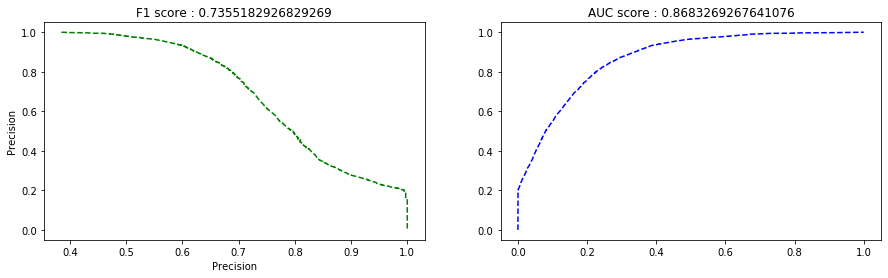

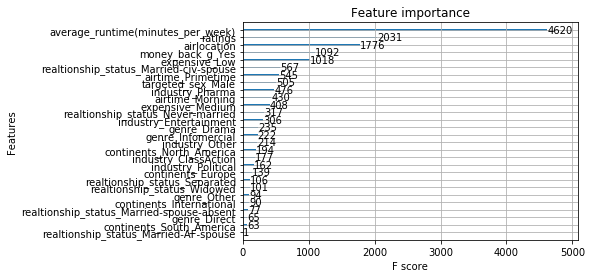

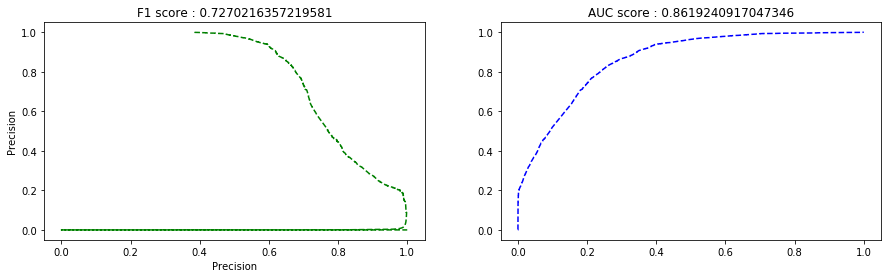

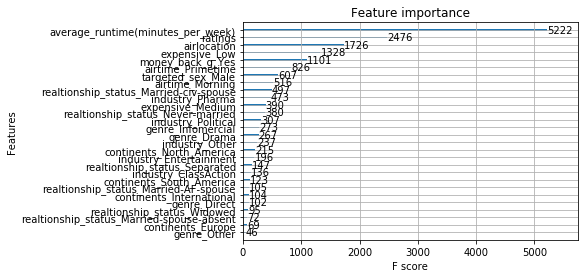

In [111]:
param = dict()
param['objective'] = 'binary:logistic'
param['eval_metric'] = 'auc'
param['seed'] = 987
param['learning_rate'] = 0.05
param['scale_pos_weight'] = 1

answer_xgb = folds(train, train_label, xgb, True, param = param, testset = test)
#df_train, df_test = cv_style(train, train_label, xgb.XGBClassifier(), test)

## LGB

Training until validation scores don't improve for 600 rounds
[5]	training's auc: 0.864063	valid_1's auc: 0.868572
[10]	training's auc: 0.865241	valid_1's auc: 0.869683
[15]	training's auc: 0.865533	valid_1's auc: 0.868624
[20]	training's auc: 0.865718	valid_1's auc: 0.868078
[25]	training's auc: 0.865812	valid_1's auc: 0.868137
[30]	training's auc: 0.865644	valid_1's auc: 0.868123
[35]	training's auc: 0.865711	valid_1's auc: 0.868138
[40]	training's auc: 0.865603	valid_1's auc: 0.867923
[45]	training's auc: 0.865548	valid_1's auc: 0.868244
[50]	training's auc: 0.865547	valid_1's auc: 0.868517
[55]	training's auc: 0.865755	valid_1's auc: 0.868435
[60]	training's auc: 0.865764	valid_1's auc: 0.868465
[65]	training's auc: 0.865665	valid_1's auc: 0.868318
[70]	training's auc: 0.865752	valid_1's auc: 0.868372
[75]	training's auc: 0.8658	valid_1's auc: 0.868276
[80]	training's auc: 0.866009	valid_1's auc: 0.868497
[85]	training's auc: 0.865958	valid_1's auc: 0.868461
[90]	training's auc: 0.

[765]	training's auc: 0.874564	valid_1's auc: 0.870684
[770]	training's auc: 0.874606	valid_1's auc: 0.870638
[775]	training's auc: 0.874633	valid_1's auc: 0.870631
[780]	training's auc: 0.87473	valid_1's auc: 0.870658
[785]	training's auc: 0.874758	valid_1's auc: 0.870649
[790]	training's auc: 0.874818	valid_1's auc: 0.870641
[795]	training's auc: 0.874823	valid_1's auc: 0.870584
[800]	training's auc: 0.874838	valid_1's auc: 0.870556
[805]	training's auc: 0.874898	valid_1's auc: 0.870526
[810]	training's auc: 0.874899	valid_1's auc: 0.870505
[815]	training's auc: 0.874949	valid_1's auc: 0.870549
[820]	training's auc: 0.874994	valid_1's auc: 0.870574
[825]	training's auc: 0.875023	valid_1's auc: 0.870554
[830]	training's auc: 0.875061	valid_1's auc: 0.870562
[835]	training's auc: 0.875057	valid_1's auc: 0.87057
[840]	training's auc: 0.875124	valid_1's auc: 0.870571
[845]	training's auc: 0.875168	valid_1's auc: 0.870532
[850]	training's auc: 0.875174	valid_1's auc: 0.870561
[855]	traini

[305]	training's auc: 0.873339	valid_1's auc: 0.859714
[310]	training's auc: 0.873405	valid_1's auc: 0.859722
[315]	training's auc: 0.873497	valid_1's auc: 0.859597
[320]	training's auc: 0.873538	valid_1's auc: 0.859579
[325]	training's auc: 0.873711	valid_1's auc: 0.859695
[330]	training's auc: 0.873719	valid_1's auc: 0.859776
[335]	training's auc: 0.8738	valid_1's auc: 0.859744
[340]	training's auc: 0.873813	valid_1's auc: 0.860315
[345]	training's auc: 0.873845	valid_1's auc: 0.860741
[350]	training's auc: 0.874129	valid_1's auc: 0.861171
[355]	training's auc: 0.87419	valid_1's auc: 0.86118
[360]	training's auc: 0.874257	valid_1's auc: 0.861251
[365]	training's auc: 0.874298	valid_1's auc: 0.861243
[370]	training's auc: 0.874326	valid_1's auc: 0.861195
[375]	training's auc: 0.8743	valid_1's auc: 0.861222
[380]	training's auc: 0.874276	valid_1's auc: 0.861207
[385]	training's auc: 0.874375	valid_1's auc: 0.861255
[390]	training's auc: 0.874392	valid_1's auc: 0.861306
[395]	training's

[1075]	training's auc: 0.880478	valid_1's auc: 0.864713
[1080]	training's auc: 0.880519	valid_1's auc: 0.864682
[1085]	training's auc: 0.88054	valid_1's auc: 0.864793
[1090]	training's auc: 0.880562	valid_1's auc: 0.864816
[1095]	training's auc: 0.880583	valid_1's auc: 0.864752
[1100]	training's auc: 0.880615	valid_1's auc: 0.86476
[1105]	training's auc: 0.880651	valid_1's auc: 0.864789
[1110]	training's auc: 0.880675	valid_1's auc: 0.864798
[1115]	training's auc: 0.880681	valid_1's auc: 0.86478
[1120]	training's auc: 0.880695	valid_1's auc: 0.86481
[1125]	training's auc: 0.880728	valid_1's auc: 0.864846
[1130]	training's auc: 0.880761	valid_1's auc: 0.864854
[1135]	training's auc: 0.880794	valid_1's auc: 0.864848
[1140]	training's auc: 0.880809	valid_1's auc: 0.864866
[1145]	training's auc: 0.880847	valid_1's auc: 0.864847
[1150]	training's auc: 0.880879	valid_1's auc: 0.864848
[1155]	training's auc: 0.880882	valid_1's auc: 0.864901
[1160]	training's auc: 0.880905	valid_1's auc: 0.864

Training until validation scores don't improve for 600 rounds
[5]	training's auc: 0.867717	valid_1's auc: 0.861833
[10]	training's auc: 0.86872	valid_1's auc: 0.861631
[15]	training's auc: 0.868453	valid_1's auc: 0.861819
[20]	training's auc: 0.867987	valid_1's auc: 0.863804
[25]	training's auc: 0.867762	valid_1's auc: 0.863762
[30]	training's auc: 0.867527	valid_1's auc: 0.863306
[35]	training's auc: 0.867659	valid_1's auc: 0.863323
[40]	training's auc: 0.867636	valid_1's auc: 0.863166
[45]	training's auc: 0.86782	valid_1's auc: 0.863634
[50]	training's auc: 0.867812	valid_1's auc: 0.86354
[55]	training's auc: 0.868042	valid_1's auc: 0.863528
[60]	training's auc: 0.868062	valid_1's auc: 0.863589
[65]	training's auc: 0.868056	valid_1's auc: 0.863477
[70]	training's auc: 0.868157	valid_1's auc: 0.863427
[75]	training's auc: 0.868532	valid_1's auc: 0.863565
[80]	training's auc: 0.868605	valid_1's auc: 0.863545
[85]	training's auc: 0.868593	valid_1's auc: 0.863528
[90]	training's auc: 0.8

[765]	training's auc: 0.876579	valid_1's auc: 0.866553
[770]	training's auc: 0.876625	valid_1's auc: 0.866613
[775]	training's auc: 0.87666	valid_1's auc: 0.866688
[780]	training's auc: 0.87667	valid_1's auc: 0.866717
[785]	training's auc: 0.876718	valid_1's auc: 0.866712
[790]	training's auc: 0.876745	valid_1's auc: 0.86671
[795]	training's auc: 0.876815	valid_1's auc: 0.866717
[800]	training's auc: 0.876867	valid_1's auc: 0.866741
[805]	training's auc: 0.876862	valid_1's auc: 0.866766
[810]	training's auc: 0.876858	valid_1's auc: 0.866713
[815]	training's auc: 0.876952	valid_1's auc: 0.866693
[820]	training's auc: 0.876998	valid_1's auc: 0.866704
[825]	training's auc: 0.877026	valid_1's auc: 0.866716
[830]	training's auc: 0.877063	valid_1's auc: 0.86675
[835]	training's auc: 0.877166	valid_1's auc: 0.866767
[840]	training's auc: 0.877267	valid_1's auc: 0.866859
[845]	training's auc: 0.877331	valid_1's auc: 0.866909
[850]	training's auc: 0.87735	valid_1's auc: 0.866925
[855]	training'

[1505]	training's auc: 0.880875	valid_1's auc: 0.867566
[1510]	training's auc: 0.880896	valid_1's auc: 0.867568
[1515]	training's auc: 0.880892	valid_1's auc: 0.867542
[1520]	training's auc: 0.880919	valid_1's auc: 0.867554
[1525]	training's auc: 0.880943	valid_1's auc: 0.867564
[1530]	training's auc: 0.880958	valid_1's auc: 0.867574
[1535]	training's auc: 0.880998	valid_1's auc: 0.867548
[1540]	training's auc: 0.881025	valid_1's auc: 0.867517
[1545]	training's auc: 0.881048	valid_1's auc: 0.867509
[1550]	training's auc: 0.881067	valid_1's auc: 0.867511
[1555]	training's auc: 0.881075	valid_1's auc: 0.867488
[1560]	training's auc: 0.88111	valid_1's auc: 0.86747
[1565]	training's auc: 0.881147	valid_1's auc: 0.867479
[1570]	training's auc: 0.881174	valid_1's auc: 0.867451
[1575]	training's auc: 0.881202	valid_1's auc: 0.867443
[1580]	training's auc: 0.881211	valid_1's auc: 0.867425
[1585]	training's auc: 0.881261	valid_1's auc: 0.867437
[1590]	training's auc: 0.881275	valid_1's auc: 0.8

[420]	training's auc: 0.871247	valid_1's auc: 0.856168
[425]	training's auc: 0.871246	valid_1's auc: 0.856103
[430]	training's auc: 0.871304	valid_1's auc: 0.856133
[435]	training's auc: 0.871372	valid_1's auc: 0.856065
[440]	training's auc: 0.87141	valid_1's auc: 0.856141
[445]	training's auc: 0.87147	valid_1's auc: 0.856193
[450]	training's auc: 0.871578	valid_1's auc: 0.856154
[455]	training's auc: 0.871713	valid_1's auc: 0.856257
[460]	training's auc: 0.871754	valid_1's auc: 0.856377
[465]	training's auc: 0.871785	valid_1's auc: 0.85632
[470]	training's auc: 0.871861	valid_1's auc: 0.85638
[475]	training's auc: 0.8719	valid_1's auc: 0.856413
[480]	training's auc: 0.871884	valid_1's auc: 0.85648
[485]	training's auc: 0.871917	valid_1's auc: 0.85645
[490]	training's auc: 0.872012	valid_1's auc: 0.856401
[495]	training's auc: 0.872068	valid_1's auc: 0.856414
[500]	training's auc: 0.872136	valid_1's auc: 0.856472
[505]	training's auc: 0.872142	valid_1's auc: 0.856339
[510]	training's a

[1205]	training's auc: 0.877046	valid_1's auc: 0.858174
[1210]	training's auc: 0.877101	valid_1's auc: 0.858145
[1215]	training's auc: 0.877114	valid_1's auc: 0.858158
[1220]	training's auc: 0.877135	valid_1's auc: 0.858141
[1225]	training's auc: 0.877159	valid_1's auc: 0.858159
[1230]	training's auc: 0.877171	valid_1's auc: 0.858111
[1235]	training's auc: 0.877163	valid_1's auc: 0.858108
[1240]	training's auc: 0.8772	valid_1's auc: 0.858147
[1245]	training's auc: 0.877202	valid_1's auc: 0.858123
[1250]	training's auc: 0.877225	valid_1's auc: 0.858128
[1255]	training's auc: 0.877267	valid_1's auc: 0.858145
[1260]	training's auc: 0.877291	valid_1's auc: 0.858161
[1265]	training's auc: 0.877304	valid_1's auc: 0.85815
[1270]	training's auc: 0.877334	valid_1's auc: 0.858158
[1275]	training's auc: 0.877329	valid_1's auc: 0.858139
[1280]	training's auc: 0.877356	valid_1's auc: 0.858115
[1285]	training's auc: 0.877425	valid_1's auc: 0.858101
[1290]	training's auc: 0.877468	valid_1's auc: 0.85

[305]	training's auc: 0.870397	valid_1's auc: 0.855622
[310]	training's auc: 0.870453	valid_1's auc: 0.855623
[315]	training's auc: 0.870505	valid_1's auc: 0.855632
[320]	training's auc: 0.870566	valid_1's auc: 0.855726
[325]	training's auc: 0.870542	valid_1's auc: 0.855726
[330]	training's auc: 0.870558	valid_1's auc: 0.855723
[335]	training's auc: 0.870628	valid_1's auc: 0.855723
[340]	training's auc: 0.870648	valid_1's auc: 0.855729
[345]	training's auc: 0.870629	valid_1's auc: 0.855737
[350]	training's auc: 0.870632	valid_1's auc: 0.855743
[355]	training's auc: 0.870722	valid_1's auc: 0.855825
[360]	training's auc: 0.870904	valid_1's auc: 0.855739
[365]	training's auc: 0.871008	valid_1's auc: 0.855841
[370]	training's auc: 0.871054	valid_1's auc: 0.855881
[375]	training's auc: 0.871079	valid_1's auc: 0.855855
[380]	training's auc: 0.871103	valid_1's auc: 0.855893
[385]	training's auc: 0.87113	valid_1's auc: 0.855902
[390]	training's auc: 0.871169	valid_1's auc: 0.855799
[395]	train

[1075]	training's auc: 0.876517	valid_1's auc: 0.856866
[1080]	training's auc: 0.876542	valid_1's auc: 0.856946
[1085]	training's auc: 0.876551	valid_1's auc: 0.856939
[1090]	training's auc: 0.87669	valid_1's auc: 0.856965
[1095]	training's auc: 0.876714	valid_1's auc: 0.856976
[1100]	training's auc: 0.876796	valid_1's auc: 0.856987
[1105]	training's auc: 0.876823	valid_1's auc: 0.856982
[1110]	training's auc: 0.876852	valid_1's auc: 0.856978
[1115]	training's auc: 0.876908	valid_1's auc: 0.856988
[1120]	training's auc: 0.876975	valid_1's auc: 0.856977
[1125]	training's auc: 0.877049	valid_1's auc: 0.856791
[1130]	training's auc: 0.877053	valid_1's auc: 0.856793
[1135]	training's auc: 0.877154	valid_1's auc: 0.856838
[1140]	training's auc: 0.877218	valid_1's auc: 0.856944
[1145]	training's auc: 0.877273	valid_1's auc: 0.856936
[1150]	training's auc: 0.877273	valid_1's auc: 0.856914
[1155]	training's auc: 0.877364	valid_1's auc: 0.856969
[1160]	training's auc: 0.877393	valid_1's auc: 0.

[85]	training's auc: 0.858435	valid_1's auc: 0.870963
[90]	training's auc: 0.858532	valid_1's auc: 0.871017
[95]	training's auc: 0.858534	valid_1's auc: 0.871068
[100]	training's auc: 0.858704	valid_1's auc: 0.871194
[105]	training's auc: 0.859416	valid_1's auc: 0.871635
[110]	training's auc: 0.859564	valid_1's auc: 0.871516
[115]	training's auc: 0.859707	valid_1's auc: 0.871606
[120]	training's auc: 0.859635	valid_1's auc: 0.871401
[125]	training's auc: 0.859757	valid_1's auc: 0.871533
[130]	training's auc: 0.859679	valid_1's auc: 0.871302
[135]	training's auc: 0.859731	valid_1's auc: 0.871404
[140]	training's auc: 0.85998	valid_1's auc: 0.871469
[145]	training's auc: 0.859967	valid_1's auc: 0.871494
[150]	training's auc: 0.86004	valid_1's auc: 0.871581
[155]	training's auc: 0.860101	valid_1's auc: 0.871524
[160]	training's auc: 0.86017	valid_1's auc: 0.871551
[165]	training's auc: 0.860141	valid_1's auc: 0.871543
[170]	training's auc: 0.860169	valid_1's auc: 0.871559
[175]	training's

[875]	training's auc: 0.86861	valid_1's auc: 0.873254
[880]	training's auc: 0.868648	valid_1's auc: 0.873231
[885]	training's auc: 0.868683	valid_1's auc: 0.873212
[890]	training's auc: 0.868687	valid_1's auc: 0.873269
[895]	training's auc: 0.868749	valid_1's auc: 0.873284
[900]	training's auc: 0.868775	valid_1's auc: 0.873296
[905]	training's auc: 0.868832	valid_1's auc: 0.873318
[910]	training's auc: 0.86888	valid_1's auc: 0.873304
[915]	training's auc: 0.86891	valid_1's auc: 0.873302
[920]	training's auc: 0.86895	valid_1's auc: 0.873303
[925]	training's auc: 0.868983	valid_1's auc: 0.873318
[930]	training's auc: 0.869008	valid_1's auc: 0.873312
[935]	training's auc: 0.869034	valid_1's auc: 0.873325
[940]	training's auc: 0.86903	valid_1's auc: 0.873336
[945]	training's auc: 0.869053	valid_1's auc: 0.87332
[950]	training's auc: 0.869112	valid_1's auc: 0.873317
[955]	training's auc: 0.869142	valid_1's auc: 0.873373
[960]	training's auc: 0.869187	valid_1's auc: 0.873398
[965]	training's

[1645]	training's auc: 0.87303	valid_1's auc: 0.872735
[1650]	training's auc: 0.873056	valid_1's auc: 0.872713
[1655]	training's auc: 0.873076	valid_1's auc: 0.872686
[1660]	training's auc: 0.873075	valid_1's auc: 0.872488
[1665]	training's auc: 0.873094	valid_1's auc: 0.872485
[1670]	training's auc: 0.87313	valid_1's auc: 0.872441
Early stopping, best iteration is:
[1072]	training's auc: 0.870101	valid_1's auc: 0.873791
[[4884 1733]
 [1046 5149]]
Accuracy is 0.783093974399001
Matrix               precision    recall  f1-score   support

       False       0.82      0.74      0.78      6617
        True       0.75      0.83      0.79      6195

    accuracy                           0.78     12812
   macro avg       0.79      0.78      0.78     12812
weighted avg       0.79      0.78      0.78     12812

Training until validation scores don't improve for 600 rounds
[5]	training's auc: 0.858216	valid_1's auc: 0.859365
[10]	training's auc: 0.858608	valid_1's auc: 0.85736
[15]	training's 

[695]	training's auc: 0.868001	valid_1's auc: 0.864338
[700]	training's auc: 0.868053	valid_1's auc: 0.864267
[705]	training's auc: 0.86805	valid_1's auc: 0.864287
[710]	training's auc: 0.868125	valid_1's auc: 0.864289
[715]	training's auc: 0.868165	valid_1's auc: 0.864337
[720]	training's auc: 0.868211	valid_1's auc: 0.864413
[725]	training's auc: 0.86826	valid_1's auc: 0.864382
[730]	training's auc: 0.868274	valid_1's auc: 0.864435
[735]	training's auc: 0.868334	valid_1's auc: 0.864429
[740]	training's auc: 0.868369	valid_1's auc: 0.864423
[745]	training's auc: 0.868411	valid_1's auc: 0.864418
[750]	training's auc: 0.868454	valid_1's auc: 0.864409
[755]	training's auc: 0.868494	valid_1's auc: 0.864333
[760]	training's auc: 0.86855	valid_1's auc: 0.864308
[765]	training's auc: 0.868615	valid_1's auc: 0.864285
[770]	training's auc: 0.868643	valid_1's auc: 0.864288
[775]	training's auc: 0.868657	valid_1's auc: 0.864328
[780]	training's auc: 0.868718	valid_1's auc: 0.864404
[785]	trainin

[1440]	training's auc: 0.872177	valid_1's auc: 0.864266
[1445]	training's auc: 0.872192	valid_1's auc: 0.864256
[1450]	training's auc: 0.872207	valid_1's auc: 0.864231
[1455]	training's auc: 0.872238	valid_1's auc: 0.864261
[1460]	training's auc: 0.872258	valid_1's auc: 0.864246
[1465]	training's auc: 0.872275	valid_1's auc: 0.864237
[1470]	training's auc: 0.872306	valid_1's auc: 0.864258
[1475]	training's auc: 0.872334	valid_1's auc: 0.864265
[1480]	training's auc: 0.87237	valid_1's auc: 0.864246
[1485]	training's auc: 0.872377	valid_1's auc: 0.864262
[1490]	training's auc: 0.872432	valid_1's auc: 0.864305
[1495]	training's auc: 0.872441	valid_1's auc: 0.8643
[1500]	training's auc: 0.872473	valid_1's auc: 0.864268
[1505]	training's auc: 0.872491	valid_1's auc: 0.864322
[1510]	training's auc: 0.872534	valid_1's auc: 0.864327
[1515]	training's auc: 0.872575	valid_1's auc: 0.864298
[1520]	training's auc: 0.872603	valid_1's auc: 0.864284
[1525]	training's auc: 0.872609	valid_1's auc: 0.86

[385]	training's auc: 0.868926	valid_1's auc: 0.854499
[390]	training's auc: 0.869021	valid_1's auc: 0.854674
[395]	training's auc: 0.86903	valid_1's auc: 0.8547
[400]	training's auc: 0.86911	valid_1's auc: 0.854938
[405]	training's auc: 0.869162	valid_1's auc: 0.854995
[410]	training's auc: 0.869221	valid_1's auc: 0.855055
[415]	training's auc: 0.86923	valid_1's auc: 0.854945
[420]	training's auc: 0.869245	valid_1's auc: 0.855058
[425]	training's auc: 0.869282	valid_1's auc: 0.855012
[430]	training's auc: 0.869307	valid_1's auc: 0.855034
[435]	training's auc: 0.869332	valid_1's auc: 0.855007
[440]	training's auc: 0.869425	valid_1's auc: 0.855116
[445]	training's auc: 0.869497	valid_1's auc: 0.855265
[450]	training's auc: 0.869594	valid_1's auc: 0.8553
[455]	training's auc: 0.869655	valid_1's auc: 0.855383
[460]	training's auc: 0.869671	valid_1's auc: 0.855307
[465]	training's auc: 0.869695	valid_1's auc: 0.855383
[470]	training's auc: 0.869761	valid_1's auc: 0.855275
[475]	training's 

[1135]	training's auc: 0.874317	valid_1's auc: 0.85658
[1140]	training's auc: 0.874357	valid_1's auc: 0.856591
[1145]	training's auc: 0.874367	valid_1's auc: 0.856555
[1150]	training's auc: 0.87439	valid_1's auc: 0.856549
[1155]	training's auc: 0.874434	valid_1's auc: 0.856556
[1160]	training's auc: 0.874463	valid_1's auc: 0.856533
[1165]	training's auc: 0.8745	valid_1's auc: 0.856536
[1170]	training's auc: 0.874496	valid_1's auc: 0.85653
[1175]	training's auc: 0.874524	valid_1's auc: 0.856535
[1180]	training's auc: 0.874572	valid_1's auc: 0.856537
[1185]	training's auc: 0.874617	valid_1's auc: 0.856508
[1190]	training's auc: 0.874656	valid_1's auc: 0.856582
[1195]	training's auc: 0.874705	valid_1's auc: 0.85657
[1200]	training's auc: 0.874743	valid_1's auc: 0.85655
[1205]	training's auc: 0.874781	valid_1's auc: 0.85655
[1210]	training's auc: 0.874812	valid_1's auc: 0.856564
[1215]	training's auc: 0.874826	valid_1's auc: 0.856567
[1220]	training's auc: 0.874849	valid_1's auc: 0.856568


[565]	training's auc: 0.86824	valid_1's auc: 0.861647
[570]	training's auc: 0.868275	valid_1's auc: 0.861632
[575]	training's auc: 0.868318	valid_1's auc: 0.861629
[580]	training's auc: 0.868365	valid_1's auc: 0.86166
[585]	training's auc: 0.868432	valid_1's auc: 0.86174
[590]	training's auc: 0.868538	valid_1's auc: 0.861695
[595]	training's auc: 0.868757	valid_1's auc: 0.861868
[600]	training's auc: 0.868786	valid_1's auc: 0.86196
[605]	training's auc: 0.86888	valid_1's auc: 0.861858
[610]	training's auc: 0.868923	valid_1's auc: 0.861865
[615]	training's auc: 0.869013	valid_1's auc: 0.861923
[620]	training's auc: 0.86905	valid_1's auc: 0.861992
[625]	training's auc: 0.869086	valid_1's auc: 0.861976
[630]	training's auc: 0.869139	valid_1's auc: 0.862006
[635]	training's auc: 0.869204	valid_1's auc: 0.862035
[640]	training's auc: 0.869231	valid_1's auc: 0.862051
[645]	training's auc: 0.869238	valid_1's auc: 0.862027
[650]	training's auc: 0.86929	valid_1's auc: 0.861988
[655]	training's 

[1330]	training's auc: 0.87388	valid_1's auc: 0.862713
[1335]	training's auc: 0.873906	valid_1's auc: 0.862711
[1340]	training's auc: 0.873932	valid_1's auc: 0.862717
[1345]	training's auc: 0.873947	valid_1's auc: 0.862702
[1350]	training's auc: 0.87397	valid_1's auc: 0.862716
[1355]	training's auc: 0.874016	valid_1's auc: 0.862739
[1360]	training's auc: 0.874012	valid_1's auc: 0.862739
[1365]	training's auc: 0.874023	valid_1's auc: 0.86272
[1370]	training's auc: 0.874053	valid_1's auc: 0.862724
[1375]	training's auc: 0.874086	valid_1's auc: 0.862743
[1380]	training's auc: 0.874128	valid_1's auc: 0.862758
[1385]	training's auc: 0.874141	valid_1's auc: 0.862783
[1390]	training's auc: 0.874172	valid_1's auc: 0.862794
[1395]	training's auc: 0.874213	valid_1's auc: 0.862789
[1400]	training's auc: 0.874222	valid_1's auc: 0.862795
[1405]	training's auc: 0.874244	valid_1's auc: 0.862787
[1410]	training's auc: 0.874254	valid_1's auc: 0.862822
[1415]	training's auc: 0.874277	valid_1's auc: 0.86

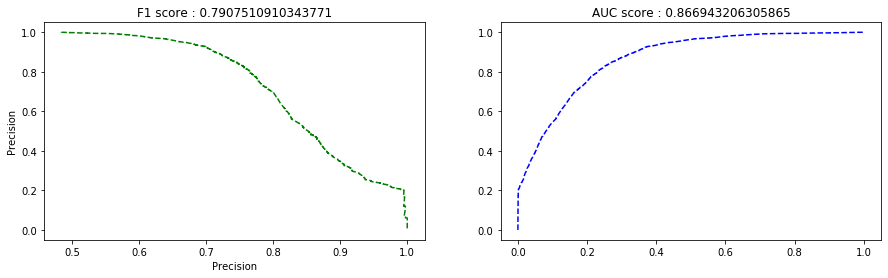

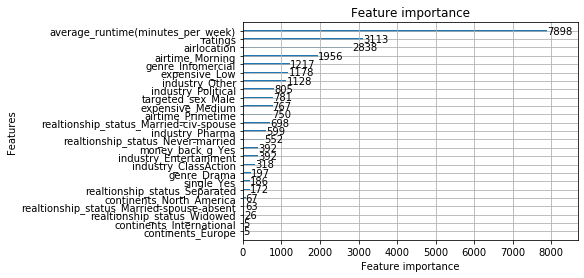

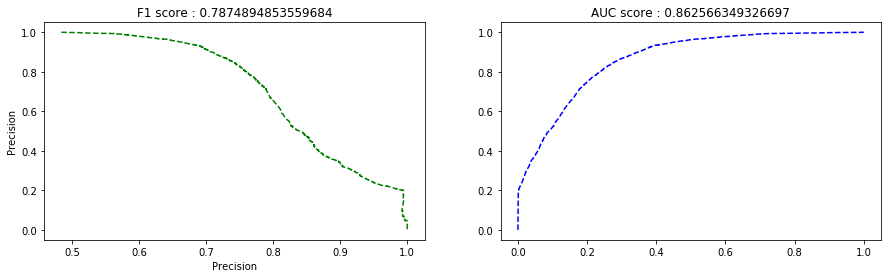

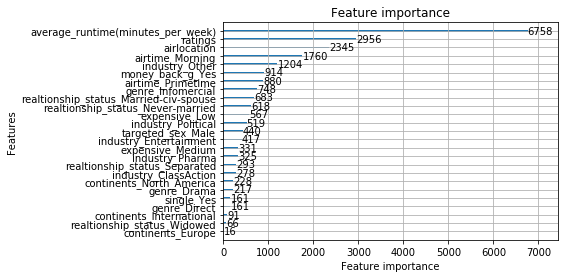

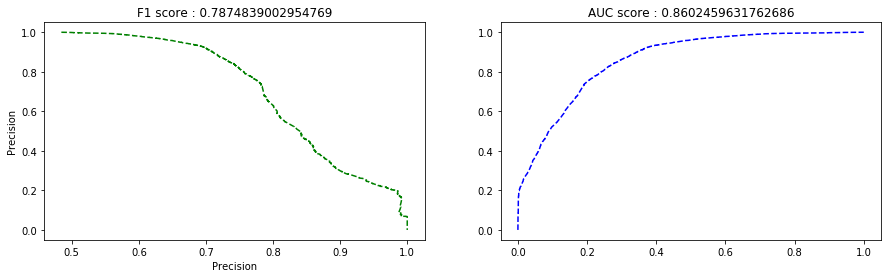

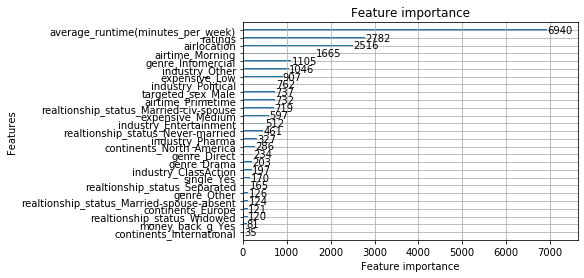

In [90]:
param = dict()
param = {
 'objective': 'binary',
 'metric' : 'auc',
 'seed' : 22,
 'learning_rate' : 0.005,
    
 'bagging_fraction': 0.09225975940006181,
  'feature_fraction': 0.7706148213591549,
  'lambda_l1': 0.8514733611547695,
  'lambda_l2': 2.101476866070212,
  'min_child_weight': 8.984763859128382,
  'min_gain_split': 0.00543874481646218,
  'num_leaves': 23}
#xgb.train(num_boost_round=21, eva)
answer = folds(train, train_label, lgb, lg_boost = True, param = param, testset = test)
#df_train, df_test = cv_style(train, train_label, lgb.LGBMClassifier(), test)

In [112]:
df = pd.Series(np.where(answer_xgb >= 0.5,True, False))

In [113]:
sample.head()

,id,netgain
0,31820,True
1,10888,True
2,26999,True
3,6912,False
4,10055,False


In [114]:
g = pd.read_csv('Test.csv')
g = pd.DataFrame({'id': g.id, 'netgain': df})

In [115]:
g.to_csv('submission_4.csv', index= False)

In [116]:
g.head()

,id,netgain
0,1,False
1,4,False
2,5,False
3,9,True
4,10,True


In [117]:
g.netgain.value_counts()

False    4192
True     2321
Name: netgain, dtype: int64

In [80]:
from bayes_opt import BayesianOptimization

def optim(train, label, n_init = 5, n_opt = 5, n_estimators = 1000, learning_rate = 0.01, random_state = 2,scale_pos_weight=3.16):
    training = lgb.Dataset(train, label)
    def op(num_leaves, lambda_l1, lambda_l2, bagging_fraction, feature_fraction, min_gain_split, min_child_weight):
        param = {}
        param['learning_rate'] = learning_rate
        param['application'] = 'binary'
        param['metrics'] = 'auc'
        param['scale_pos_weight'] = scale_pos_weight
        param['n_estimators'] = n_estimators
        param['random_state'] = random_state
        param['num_leaves'] = int(round(num_leaves))
        param['lambda_l1'] = max(lambda_l1, 0) 
        param['lambda_l2'] = max(lambda_l2, 0)
        param['bagging_fraction'] = min(max(bagging_fraction,0),1)
        param['feature_fraction'] = min(max(feature_fraction,0),1)
        param['min_gain_split'] = min_gain_split
        param['max_depth'] = -1
        param['min_child_weight'] = min_child_weight
        
        output = lgb.cv(param, training, nfold=3, metrics=['auc'], num_boost_round=4000, early_stopping_rounds=500, 
                        stratified=True)
        return(max(output['auc-mean']))
    
    baye = BayesianOptimization(op, {'num_leaves':(2,70), 'lambda_l1':(0,1), 'lambda_l2':(0,4),
                                     'bagging_fraction':(0,1), 'feature_fraction':(0,1),
                                     'min_gain_split':(0.0001, 0.01), 'min_child_weight':(2,25)})
    
    baye.maximize(init_points=n_init, n_iter=n_opt)
    return(baye)

In [81]:
df = pd.concat([train, train_label], axis =1)
false_index = df[df.netgain == False].index
true_index = df[df.netgain == True].index
df_False = df.drop(index = true_index)
df_True = df.drop(index = false_index)
    
df_True.reset_index(drop=True, inplace=True)
df_False.reset_index(drop=True, inplace=True)


In [82]:
for i,batch in enumerate(np.array_split(df_False, 3)):
        batch = pd.concat([batch, df_True], axis = 0)
        batch = shuffle(batch)
        x = optim(batch.drop(columns = 'netgain'), batch.netgain, random_state=88)
        break

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | min_ch... | min_ga... | num_le... |
-------------------------------------------------------------------------------------------------------------
|  1        |  0.867    |  0.5292   |  0.2816   |  0.2566   |  2.222    |  16.31    |  0.005208 |  5.055    |
|  2        |  0.8687   |  0.09226  |  0.7706   |  0.8515   |  2.101    |  8.985    |  0.005439 |  22.68    |
|  3        |  0.8668   |  0.4136   |  0.6869   |  0.8481   |  3.96     |  19.01    |  0.008251 |  63.35    |
|  4        |  0.868    |  0.4381   |  0.5427   |  0.7111   |  3.802    |  13.77    |  0.002068 |  66.55    |
|  5        |  0.8568   |  0.3691   |  0.1043   |  0.3231   |  3.895    |  18.27    |  0.00976  |  24.17    |
|  6        |  0.8658   |  0.3591   |  0.786    |  0.5254   |  0.06696  |  24.57    |  0.000822 |  69.98    |
|  7        |  0.8582   |  0.06184  |  0.1375   |  0.9328   |  3.998    |  2.159    |  0.009725 |  2.513    |
|  8      

In [83]:
x.res[1]

{'target': 0.868708491956362,
 'params': {'bagging_fraction': 0.09225975940006181,
  'feature_fraction': 0.7706148213591549,
  'lambda_l1': 0.8514733611547695,
  'lambda_l2': 2.101476866070212,
  'min_child_weight': 8.984763859128382,
  'min_gain_split': 0.00543874481646218,
  'num_leaves': 22.682043567837972}}

In [239]:
round(3.576)

4